<a href="https://colab.research.google.com/github/salimNabbout/Qualidade_Vinhos_Norte_Portugal/blob/main/Qualidade_Vinho_Tinto_CLASSIFICACAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**POS GRADUAÇÃO EM CIÊNCIAS DE DADOS -  PUC RIO**

##**MVP SPRINT 1** 

##**PROJETO - CLASSIFICAÇÃO DE VINHOS DE ALTA QUALIDADE - NORTE DE PORTUGAL**

##**ALUNO: SALIM JORGE NABBOUT**

##**1. JUSTIFICATIVA DO PROJETO**

Esta análise foi solicitada por um grande distribuidor de vinhos, localizado no estado do Rio de janeiro. Esta empresa solicitou uma análise minuciosa dos dados físico-químico de vinhos produzidos ao norte de Portugal, tidos como uns dos melhores vinhos do mundo.

O Objetivo é importar vinhos não somente de Portugal, mas também do Brasil que atendesse as proximidades das características físico-químico dos vinhos analisados. A partir das análises de dados, referenciado pelos vinhos portugueses, cria se uma modelagem para o problema com objetivo de uma melhor tomadas de decisão na hora de avaliar as características dos vinhos a serem adquiridos para venda.

A primeira etapa foi entender o problema. Identificamos que para este distribuidor não interessava vinhos com baixo valor agregado, o que está diretamente ligado a Melhor Qualidade desta bebida.

A segunda etapa foi obter os dados para análise exploratória e o Pré-Processamento. Através da Câmara de Comercio de Vinhos do Norte de Portugal - CCVNP obtivemos o "dataset" dos 1599 diferentes tipos de vinhos fabricados nesta região.

Identificamos que as tarefas associadas a este dataset são: CLASSIFICAÇÃO E REGRESSÃO. O que nos leva a concluir que se trata de um APRENDIZADO SUPERVISIONADO

Junto ao engenheiro de alimentos e ao sommelier do distribuidor, levantamos algumas premissas relacionadas a características físico-químicas que nos remetem a uma qualidade melhor de um vinho. Dentre as principais características, declarada pelo especialista está o pH do vinho, entretanto somente esta informação não nos remete a selecionar o de melhor qualidade. Deverá ser analisado outras características fundamentais para que a Ciências de Dados possa entregar uma modelagem mais assertiva aos interessados.


________________________________________________________________________________

##**2. ANALISE EXPLORATÓRIA DE DADOS**

##**2.1 Etapa de Importação das Bibliotecas**

 2.1.1 Etapa de Importação das Bibliotecas

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings

# transformação Numerica
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# transformação categórica
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Exibição de Dados no Jupyter Notebook

from IPython.display import display


from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM


##**2.2 Caminho de Leitura do Datasets**

2.2.1 Importando dados da URL para o Dataframe

2.2.1.1 URL a importar

In [ ]:
Qldvinhos= pd.read_csv(r'https://raw.githubusercontent.com/salimNabbout/Qualidade_Vinhos_Norte_Portugal/main/content/winequality-red.csv')

##**2.3 Definição dos Atributos do Datasets**

2.3.1 Labels do Atributos do Dataset

In [ ]:
labels_atributos = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', ]

##**2.4 Verificando que o Qldvinhos é um Dataframe**

In [ ]:
type(Qldvinhos)

pandas.core.frame.DataFrame

##**2.4.1 Exibindo as Cinco Primeiras Linhas do Dataset**

***Observa se nas duas primeiras linhas do atributo citric acidy ( Acido Citrico) estão zeradas.***

In [ ]:
Qldvinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##**2.4.2 Exibindo as Cinco Ultimas Linhas do Dataset Original**

In [ ]:
Qldvinhos.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


2.4.3 Exibindo o nome dos Atributos.

Os atributos são do tipo MULTIVARIADA e com seus valores em REAL

In [ ]:
Qldvinhos.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##**2.5 Definição dos Atributos do Dataset**

2.5.1 os valores referencias foram fornecidos pelo especialista em vinhos



*   **Fixed Acidity** = a acidez fixa refere-se, basicamente, aos ácidos que não são capazes de se volatilizar, provenientes da fermentação. 

Valor referencia - 5.8 - 8.9 g/l

*   **Volatile Acidity** = acidez e aroma muito desagradável, provocado pela presença de teor elevado de ácido acético e de acetato de etila no vinho, compostos produzidos essencialmente por bactérias acéticas.

Valor referencia - 0.009 - 1.210 g/l

*   **Citric Acid** = O ácido cítrico está presente nas uvas em menor quantidade, sendo que nos vinhos apresenta pouca ou nenhuma presença. 

Valor referencia - 0.000 - 0.098 g/l

*  **Residual sugar **= o açúcar residual é proveniente da própria uva – pode ser frutose ou glicose – e resta ao final do processo de fermentação.

Valor referencia - 2.00 - 2.500 g/l

*   **chlorides** = Uma adição de sais no vinho. A sua principal função é de antioxidante, mas também possui funções de desinfetante porque é bactericida (em particular) e fungicida, melhorador de aroma e afinador de cor.

Valor referencia - 0.009 - 0.098 mg/l

*   **Free Sulfur Dioxide** = Os sulfitos (SO2) são sais do ácido sulfuroso que são liberados quando o ácido se dissocia.

Valor referencia - 8.5 - 19.3 mg/l

*   **total sulfur dioxide** = O dióxido de enxofre (SO2) é um composto muito importante utilizado na conservação de vinhos, devido às suas propriedades antioxidantes.

Valor referencia - 25.7 - 58.2 mg/l

*  **density** =  Está relacionada principalmente ao seu teor alcoólico e de açúcares residuais.

Valor referencia - 0.095 - 1.000 (Amostra de FT)

*  **pH** = Teor de acidez do vinho, que varia entre o vinho branco e o vinho tinto.

Valor referencia - 3.2 - 3.6

*   **sulphates**= No vinho, o sulfito é utilizado como conservante, devido às suas propriedades antioxidantes e antibacterianas, evitando que os vinhos degradem de forma mais rápida.
Valor referencia - 0.310 - 1.980 ppm

*  **alcohol ** = É o resultado da fermentação dos açúcares da uva (glicose e frutose), que acontece graças a presença de leveduras no mosto. 

Valor referencia - 9.5 - 10.2 GL

*   **quality** = As pontuações , onde varia de 0 a 10, onde 0 são vinhos de pessima qualidade e 10 de excelente qualidade









##**2.6 Dimensões do Dataset**

O dataset possui 1599 linhas, 12 atributos e 4898 instâncias

In [ ]:
Qldvinhos.shape

(1599, 12)

##**2.7 Exibindo a Quantidade de Linhas do Dataset**

In [ ]:
Qldvinhos.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

##**3. SUMÁRIO ESTATISTICO**

Analisando o Sumário estatistico, observamos que as variáveis : volatile acidity, citric acid, chlorides, density, pH, sulphate, apresentam baixo desvio padrão (std). Eliminaremos estas variáves da analise de dados, pois praticamente não há muita dispersão nos dados destes atributos. 

Estes dados não serão eliminados do dataframe. Eles não serão analisados individualmente como os outros atributos.



In [ ]:
Qldvinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##**4. PRÉ-PROCESSAMENTO**

##**4.1 Carregamento o Dataset ORIGINAL**

In [ ]:
# Informa a URL de importação do dataset
url = (r'https://raw.githubusercontent.com/salimNabbout/Qualidade_Vinhos_Norte_Portugal/main/content/winequality-red.csv')

# Lê o arquivo 
dataset = pd.read_csv(url, delimiter=',')

# Exibindo as primeiras linhas
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##**4.2 Tratamento de MISSING**

Verificando os Valores faltantes no Datasets


In [ ]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Nesta etapa será salvo um novo arquivo, chamado de Dataset em substituição ao original "Qldvinhos" para executar o tratamento de MISSING.

Observamos na coluna do atributo citric acidity, que existem valores nulos. Este atrubuto deverá sofrer um tratamento na sequencia do pré processamento

<Axes: >

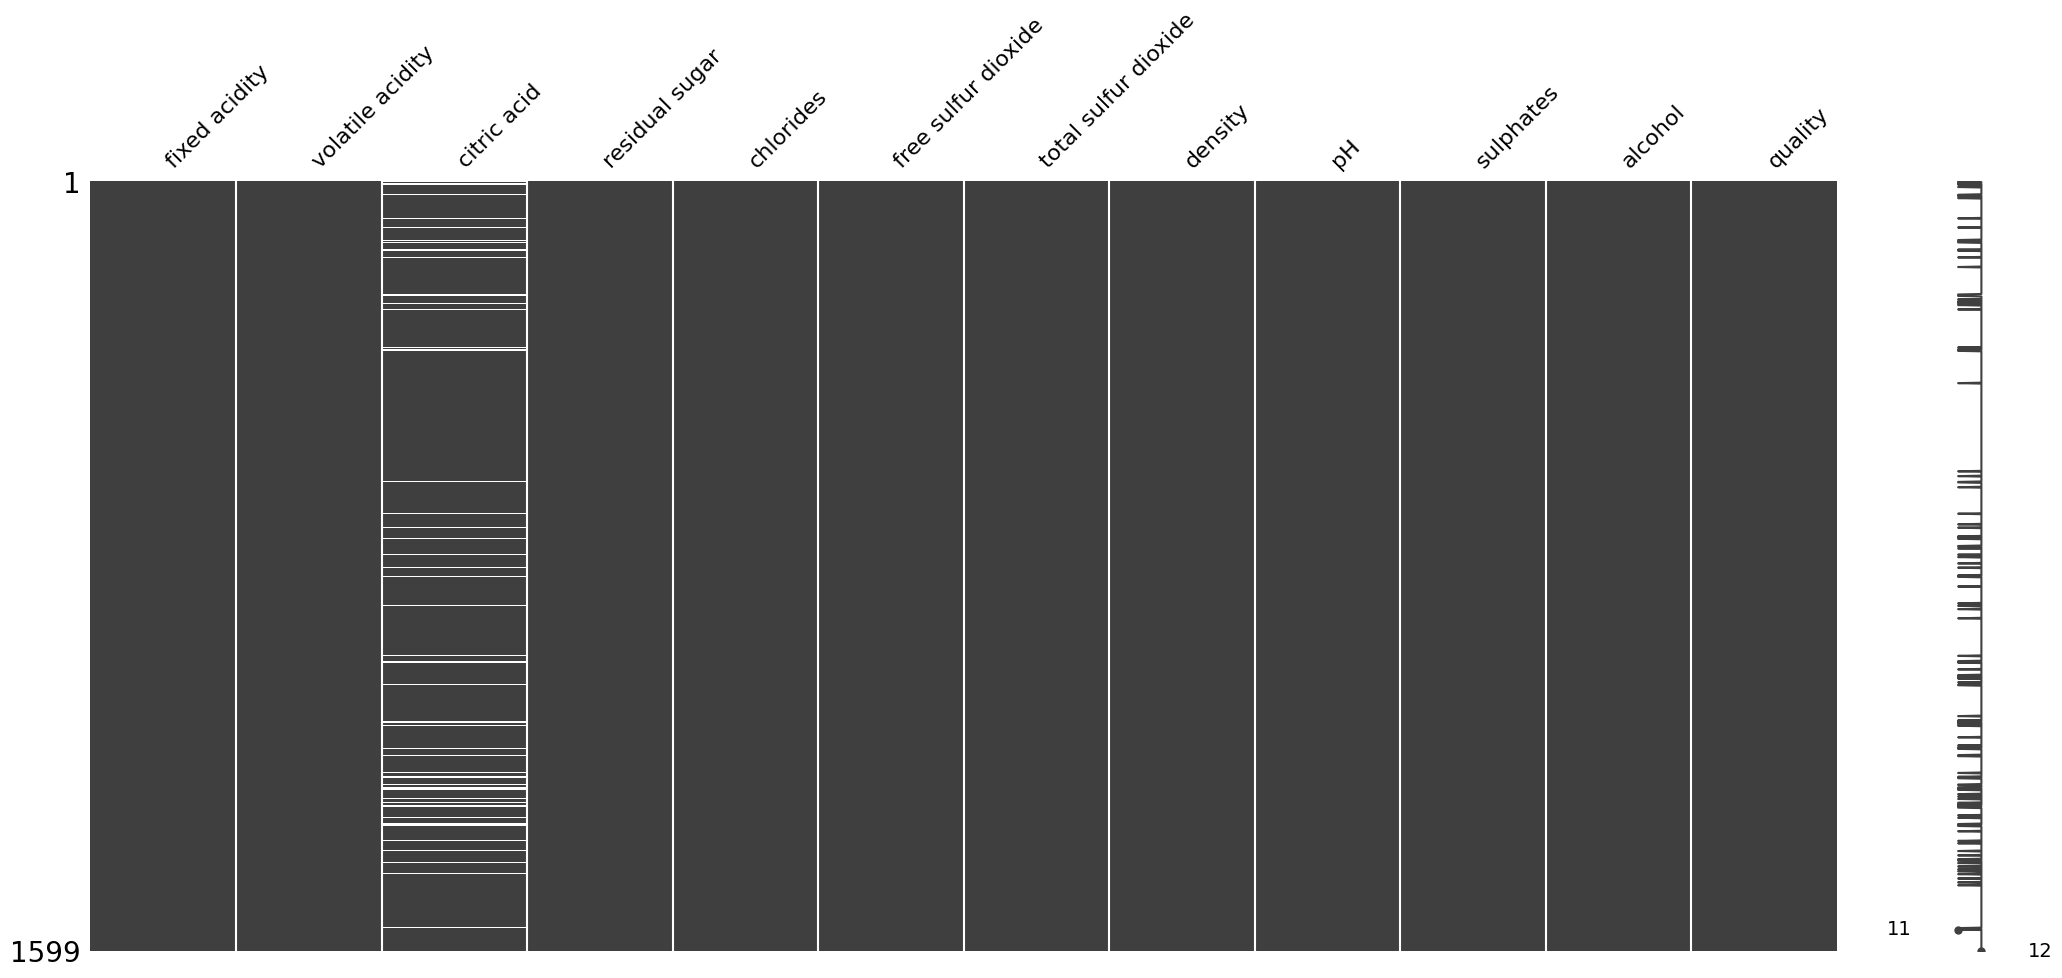

In [ ]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

##**4.3 Reverificando o Dataset Apos as Substituições dos Zeros por NaN**

In [ ]:
datasetSemMissings.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

##**4.4 Tratando O DATASET**

Existem 132 valores zerados na coluna do "citric acid", como este valor representa apenas 8,2% do total dos valores desta coluna, iremos substituir esses valores faltantes pela mediana da coluna.

Substituindo os NaN de "citric acid" pela mediana do atributo

Exibindo a Matriz de nulidade do dataset apos tratamento

<Axes: >

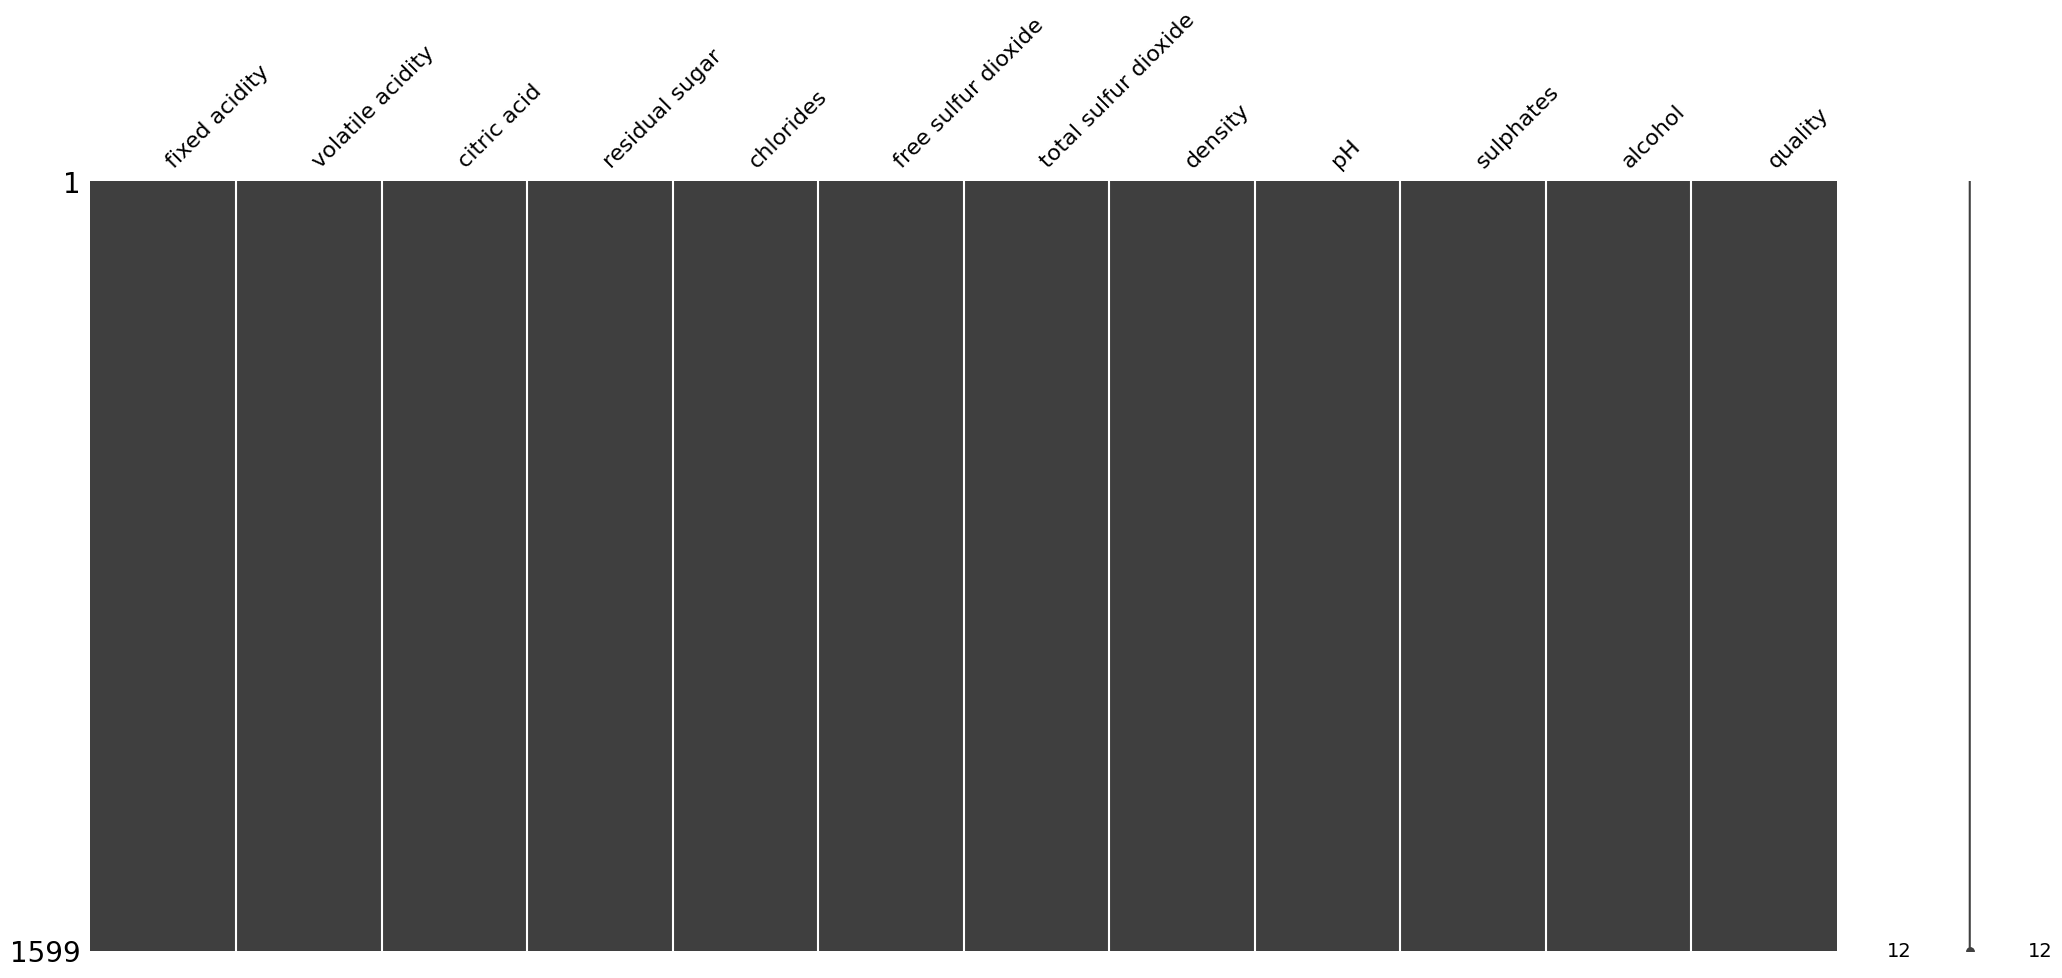

In [ ]:
datasetSemMissings['citric acid'].fillna(datasetSemMissings['citric acid'].median(), inplace=True)

ms.matrix(datasetSemMissings)

A figura acima , mostra o Dataset tratado preservando as caracteristicas de linhas e colunas do dataset original. Entretanto os zeros na coluna do atributo "citric acid" foram substituidos pela mediana desta coluna (0,28), que se observava nas linhas 0 e 1 do dataset original em comparação ao dataset antes do tratamento



##**4.5 Tabelas Comparativas - Antes e depois do Tratamento**

As tabelas abaixo servem de comparação entre o dataset original( Qldvinhos ) e o dataset apos o tratamento (datasetSemMissing ).

 Observamos que apos o TRATAMENTO, os valores zerados nas duas primeiras linhas do dataframe foram SUBSTITUIDAS PELA MEDIANA DO ATRIBUTO.

In [ ]:
Qldvinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
datasetSemMissings.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.28,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.28,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.28,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As duas tabelas abaixo, servem apenas de CONFIRMAÇÃO do tratamento realizado.

A PRIMEIRA tabela mostra que nenhuma linha desceu por NÃO apresentar MISSING em TODAS linhas ou colunas.


A SEGUNDA tabela constata que nenhuma linha desceu por NÃO apresentar MISSING em ALGUMAS linhas ou colunas.



In [ ]:
datasetSemMissings=datasetSemMissings.dropna(how='all')
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
datasetSemMissings=datasetSemMissings.dropna(how='any')
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


##**4.6 Vereificando os NULLS do Dataset Tratado**

In [ ]:
datasetSemMissings.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##**4.7 TRANSFORMAÇÃO NUMERICA**

##**4.7.1 Etapa de Normalização dos Dados**

In [ ]:

# Separandop os componentes do dataset em X (imput) e y (output)
x= Qldvinhos.values[:,0:8]
y= Qldvinhos.values[:,8]

# Normalizando os dados
rescaledX=MinMaxScaler().fit_transform(x)
print('qldvinhos:\n\n', datasetSemMissings.values)
print('datasetSemMissing:\n\n', rescaledX)



qldvinhos:

 [[ 7.4    0.7    0.28  ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.28  ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
datasetSemMissing:

 [[0.24778761 0.39726027 0.         ... 0.14084507 0.09893993 0.56754772]
 [0.28318584 0.52054795 0.         ... 0.33802817 0.2155477  0.49412628]
 [0.28318584 0.43835616 0.04       ... 0.1971831  0.16961131 0.50881057]
 ...
 [0.15044248 0.26712329 0.13       ... 0.3943662  0.12014134 0.41629956]
 [0.11504425 0.35958904 0.12       ... 0.43661972 0.13427562 0.39647577]
 [0.12389381 0.13013699 0.47       ... 0.23943662 0.12720848 0.3979442 ]]


##**4.7.2 Etapa de Padronização dos Dados**

In [ ]:
rescaledX=StandardScaler().fit_transform(x)
print('qldvinhos:\n\n', datasetSemMissings.values)
print('datasetSemMissing:\n\n', rescaledX)

qldvinhos:

 [[ 7.4    0.7    0.28  ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.28  ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
datasetSemMissing:

 [[-0.52835961  0.96187667 -1.39147228 ... -0.46619252 -0.37913269
   0.55827446]
 [-0.29854743  1.96744245 -1.39147228 ...  0.87263823  0.62436323
   0.02826077]
 [-0.29854743  1.29706527 -1.18607043 ... -0.08366945  0.22904665
   0.13426351]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  1.2551613  -0.19667889
  -0.53355375]
 [-1.39015528  0.65462046 -0.77526673 ...  1.54205361 -0.07504302
  -0.67665745]
 [-1.33270223 -1.21684919  1.02199944 ...  0.20322286 -0.13586095
  -0.66605717]]


##**8. ANALISE ESTATISTICA**

##**8.1 Sumário Estatistico do Datasets Tratado**

Assim como no sumario estatistico antes do tratamento, manteremos os atributos com pequenos desvio padrão fora das analises individuais deles.
		

In [ ]:
datasetSemMissings.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1467.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.295358,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.184819,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.140000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.280000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.440000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##**8.2 Verificando Ausencia de Valores no Dataset Tratado por Atributo**

Observamos que NÃO existem valores não nulos 

In [ ]:
datasetSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##**8.3 CALCULO ESTATISTICO POR ATRIBUTO** 

Os atributos mencionados, no sumário estatistico , que possuem baixo desvio padrão estam fora das analises individuais deles.

Como estes atributos possuem pequenas variações dentro do daframe. Iremos desconsidera los

##**8.3.1 Analise Estatistica do Atributo Qualidade**


In [ ]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'quality'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'quality'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'quality']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'quality']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'quality']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'quality']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'quality']. min()

print("variancia quality = " + str(variancia))
print("desviopd quality = " + str(desviopd))
print("media quality = " + str(media))
print("median quality = " + str(median))
print("mode quality = " + str(mode))
print("max quality = " + str(max))
print("min quality = " + str(min))

variancia quality = 0.6517605398308277
desviopd quality = 0.8073168769639513
media quality = 5.6360225140712945
median quality = 6.0
mode quality = 0    5
Name: quality, dtype: int64
max quality = 8
min quality = 3


In [ ]:
sns.boxplot(x=datasetSemMissings['quality'])

A qualidade é o atributo que nos aponta os vinhos de melhores peculiaridades. Na analise estatistica deste atributo, observamos a maior frequencia os vinhos pontuados por 5, mostrado pela MODA . Podemos classificar estes vinhos como de qualidade media, o que tambem é provado no calculo estatistico da qualidade. Onde se aponta a media no valor de 5.6. 

Tendo como objetivo , selecionar os vinhos com caracteristicas dentro de valores fornecidos pelo especialista do cliente. Classificamos os vinhos com qualidade 6 e 7 como os vinhos a serem selecionados.


In [ ]:
sns.histplot(datasetSemMissings['quality'], bins=6);

Conforme claculo estatistico desta variável, confirmamos que os vinhos pontuados por 5 aparecem em maior frequencia em nossos dados(Moda). Entretanto, como a meta são vinhos de maior qualidade, confirma se a escolha dos vinhos pontuados por 6 e 7. 

Observa se a existência de uma quantidade proxima a 837 tipos diferentes de vinhos na soma destas categoria de qualidade.

Esta etapa é o principal filtro para a escolha dos fabricantes que deverão ser futuros parceiros da referida distribuidora. Entretanto as proximas analises, os outros atributos, deverá estar contida, conforme valores referências de cada atributo, nestes 837 tipos de vinhos, conforme tabela abaixo.

Serão avaliados 52,34% do total de diferentes  tipos de vinhos do dataframe.

In [ ]:
dfqualidade = datasetSemMissings[(datasetSemMissings['quality']>=6) & (datasetSemMissings['quality']<=7)] 
dfqualidade['quality']

3       6
7       7
8       7
16      7
19      6
       ..
1592    6
1593    6
1595    6
1596    6
1598    6
Name: quality, Length: 837, dtype: int64

##**8.3.2 Analise Estatística do Atributo - fixed acidity**





In [ ]:
# Calculo da Variancia
variancia = datasetSemMissings.loc[:,'fixed acidity'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'fixed acidity'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'fixed acidity']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'fixed acidity']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'fixed acidity']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'fixed acidity']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'fixed acidity']. min()

print("variancia fixed acidity = " + str(variancia))
print("desviopd fixed acidity = " + str(desviopd))
print("media fixed acidity = " + str(media))
print("median fixed acidity = " + str(median))
print("mode fixed acidity = " + str(mode))
print("max fixed acidity = " + str(max))
print("min fixed acidity = " + str(min))

variancia fixed acidity = 3.0295205688671114
desviopd fixed acidity = 1.7405518001102729
media fixed acidity = 8.31963727329581
median fixed acidity = 7.9
mode fixed acidity = 0    7.2
Name: fixed acidity, dtype: float64
max fixed acidity = 15.9
min fixed acidity = 4.6


In [ ]:
sns.boxplot(x=datasetSemMissings['fixed acidity'])

No grafico acima percebemos a dispersão dos dados com sua simetria a direita. O valor maximo distribuito no dataframe deste atributo é 15,9 g/l. Entretanto podemos observar que valores acima de aproximadamente 12 g/l são considerados outliers.

Os valores aceitáveis deste atributo, fornecido pelo especialista, são de 5.8 g/l a 8.9 g/l. Esta faixa de valores correspondem a pelo menos 50% dos diferentes tipos de vinhos deste dataframe, pois Q2 (Mediana) tem seu valor em  7.9 g/l.

In [ ]:
sns.histplot(datasetSemMissings['fixed acidity'], bins=7);

o histograma mostra que os valores de acidez fixa desejado pelo cliente estão presente em 1087 diferentes tipos desta bebida, conforme os dados apontam na tabela abaixo.

1087 diferentes tipos de vinhos se limitam dentro dos valores referencias.

In [ ]:
dfacidezfixa= datasetSemMissings[(datasetSemMissings['fixed acidity']>=5.8) & (datasetSemMissings['fixed acidity']<=8.9)]
dfacidezfixa['fixed acidity']

0       7.4
1       7.8
2       7.8
4       7.4
5       7.4
       ... 
1594    6.2
1595    5.9
1596    6.3
1597    5.9
1598    6.0
Name: fixed acidity, Length: 1087, dtype: float64

##**8.3.3 Analise Estatística do Atributo - Residual Sugar** 



In [ ]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'residual sugar'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'residual sugar'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'residual sugar']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'residual sugar']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'residual sugar']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'residual sugar']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'residual sugar']. min()

print("variancia residual sugar = " + str(variancia))
print("desviopd residual sugar = " + str(desviopd))
print("media residual sugar = " + str(media))
print("median residual sugar = " + str(median))
print("mode residual sugar = " + str(mode))
print("max residual sugar = " + str(max))
print("min residual sugar = " + str(min))

variancia residual sugar = 1.9866539202698996
desviopd residual sugar = 1.4094871124880495
media residual sugar = 2.53880550343965
median residual sugar = 2.2
mode residual sugar = 0    2.0
Name: residual sugar, dtype: float64
max residual sugar = 15.5
min residual sugar = 0.9


In [ ]:
sns.boxplot(x=datasetSemMissings['residual sugar'])

Observando o grafico de caixa, identificamos os limites minimo  e máximo de aproximadamente 0,9 g/l e 3.8 g/l. O valor máximo dentro do dataframe é 15,5 g/l . Entretanto este valor é considerado outliers, assim como quaisquer valor acima de aproximadamente 3.8 g/l. 

Os valores referencia são entre 2.0 a 3.7 g/l. trata se de um gráfico com uma assimetria a direta. 

A MODA = 2.0 , MEDIA= 2.5 e a MEDIANA = 2.2, existe a possibilidade de uma grande quantidade de diferentes tipos de vinhos estarem dentro dos valores referencias. 

In [ ]:
sns.histplot(datasetSemMissings['residual sugar'], bins=5);

Analisando o histograma observamos que os valores referencias estam presentes em grande quantidade neste atributo.

Averiguando o df abaixo, identificamos 984 diferentes tipos de vinhos que obedecem aos valores referencias.

In [ ]:
dfacucarresidual= datasetSemMissings[(datasetSemMissings['residual sugar']>=2.0) & (datasetSemMissings['residual sugar']<=3.7)]
dfacucarresidual['residual sugar']

1       2.6
2       2.3
8       2.0
21      2.3
23      2.3
       ... 
1594    2.0
1595    2.2
1596    2.3
1597    2.0
1598    3.6
Name: residual sugar, Length: 984, dtype: float64

##**8.3.4 Analise Estatistica do Atibuto - free sulfur dioxide**


In [ ]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'free sulfur dioxide'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'free sulfur dioxide'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'free sulfur dioxide']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'free sulfur dioxide']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'free sulfur dioxide']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'free sulfur dioxide']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'free sulfur dioxide']. min()

print("variancia free sulfur dioxide = " + str(variancia))
print("desviopd free sulfur dioxide = " + str(desviopd))
print("media free sulfur dioxide = " + str(media))
print("median free sulfur dioxide = " + str(median))
print("mode free sulfur dioxide = " + str(mode))
print("max free sulfur dioxide = " + str(max))
print("min free sulfur dioxide = " + str(min))

variancia free sulfur dioxide = 109.34645676374501
desviopd free sulfur dioxide = 10.45688561493072
media free sulfur dioxide = 15.874921826141339
median free sulfur dioxide = 14.0
mode free sulfur dioxide = 0    6.0
Name: free sulfur dioxide, dtype: float64
max free sulfur dioxide = 72.0
min free sulfur dioxide = 1.0


In [ ]:
sns.boxplot(x=datasetSemMissings['free sulfur dioxide'])

Grafico com Assimetrica a direita, observamos que o valor maximo é 40 mg/l e que os valores acima são considerados dispersões. A MODA = 6, valor abaixo do minimo do valor referencia, que é 8.5 mg/l. 

Levando em consideração que Q2 = 14.000 mg/l e  Q3 = 21.000 mg/l. Existem grandes possibilidades de se possuir uma quantidade razoável de diferentes tipos de vinhos para serem classificados

In [ ]:
sns.histplot(datasetSemMissings['free sulfur dioxide'], bins=14);

8.5 mg/l a 19.3 mg/l são os valores referencias fornecidos pelo especialista. Analisando o histograma observamos a presença destes valores na segunda e terceira barra do histograma. O somatório destas barras resulta nos diferentes tipos de vinhos com seus padrões de referencia aceitáveis.

O df abaixo, nos permite conhecer com precisão o quantitativo disponivel no df que atendem a os valores referencias deste atributo. No caso deste atributo, possem 666 diferentes tipos de vinhos.

In [ ]:
dfdioxidolivre= datasetSemMissings[(datasetSemMissings['free sulfur dioxide']>=8.5) & (datasetSemMissings['free sulfur dioxide']<=19.3)]
dfdioxidolivre['free sulfur dioxide']

0       11.0
2       15.0
3       17.0
4       11.0
5       13.0
        ... 
1580     9.0
1582    13.0
1587    18.0
1591    16.0
1598    18.0
Name: free sulfur dioxide, Length: 666, dtype: float64

##**8.3.5 Analise Estatística do Atibuto - total sulfur dioxide**

In [ ]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'total sulfur dioxide'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'total sulfur dioxide'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'total sulfur dioxide']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'total sulfur dioxide']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'total sulfur dioxide']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'total sulfur dioxide']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'total sulfur dioxide']. min()

print("variancia total sulfur dioxide = " + str(variancia))
print("desviopd total sulfur dioxide = " + str(desviopd))
print("media total sulfur dioxide = " + str(media))
print("median total sulfur dioxide = " + str(median))
print("mode total sulfur dioxide = " + str(mode))
print("max total sulfur dioxide = " + str(max))
print("min total sulfur dioxide = " + str(min))

variancia total sulfur dioxide = 1081.42563558916
desviopd total sulfur dioxide = 32.88503665178374
media total sulfur dioxide = 46.46779237023139
median total sulfur dioxide = 38.0
mode total sulfur dioxide = 0    28.0
Name: total sulfur dioxide, dtype: float64
max total sulfur dioxide = 289.0
min total sulfur dioxide = 6.0


In [ ]:
sns.boxplot(x=datasetSemMissings['total sulfur dioxide'])

Observamos uma alta dispersão dos dados deste atributo. A maxima aponta para 125 mg/l. Este valor atende a maxima do valor referencia que é  98.2 mg/l do dioxido de enxofre total. A MEDIANA = 38.000 mg/l e a MODA = 28.000 mg/l. Estes valores estatisticos, apontam para uma pequena quantidade de vinhos, que atendem a os valores referencias, que são 55.7 mg/l a 98.2 mg/l.  A MODA < que o valor minimo referencia, confirma um indicio de pequena quantidade de vinhos dentro do padrao de referencia.

Um valor baixo de opção nos restringe em todos os outros atributos, ainda que estes atendam aos valores referências

In [ ]:
sns.histplot(datasetSemMissings['total sulfur dioxide'], bins=10);

Investigando o histograma acima observando a terceira coluna do grafico, que nos remetem ao valor maximo referencia, 98.2 mg/l. Esta coluna possue um pouco mais de 200  unidades de vinhos nos valores referências.

Observando o df abaixo, podemos quantificar com precisão quantos tipos de vinhos o df possue , atendendo aos valores referências. são exatos 337 unidades.

In [ ]:
dfdioxidototal= datasetSemMissings[(datasetSemMissings['total sulfur dioxide']>=55.7) & (datasetSemMissings['total sulfur dioxide']<=98.2)]
dfdioxidototal['total sulfur dioxide']

1       67.0
3       60.0
6       59.0
10      65.0
12      59.0
        ... 
1539    60.0
1574    92.0
1583    98.0
1586    60.0
1589    79.0
Name: total sulfur dioxide, Length: 337, dtype: float64

##**8.3.6 Analise Estatística do Atibuto - alcohol**

In [ ]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'alcohol'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'alcohol'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'alcohol']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'alcohol']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'alcohol']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'alcohol']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'alcohol']. min()

print("variancia alcohol = " + str(variancia))
print("desviopd alcohol = " + str(desviopd))
print("media alcohol = " + str(media))
print("median alcohol = " + str(median))
print("mode alcohol = " + str(mode))
print("max alcohol = " + str(max))
print("min alcohol = " + str(min))

variancia alcohol = 1.1349371714889036
desviopd alcohol = 1.0653343003437483
media alcohol = 10.422983114446529
median alcohol = 10.2
mode alcohol = 0    9.5
Name: alcohol, dtype: float64
max alcohol = 14.9
min alcohol = 8.4


In [ ]:
sns.boxplot(x=datasetSemMissings['alcohol'])

O grafico de caixa, Assimetrico a direita, com desvio padrão pequeno, 1.065, e pequena amplitude. 
A MODA deste atibuto é = 9.5 GL, o mesmo valor da minima dos valores de referencias. A MODA tendo o mesmo valor do valor minimo de referencia, nos permitem acreditar que teremos um valor razoável de diferentes tipos de vinhos dentro desta faixa de referencia.

In [ ]:
sns.histplot(datasetSemMissings['alcohol'], bins=10);

Explorando o histograma acima, observamos no minimo 500 diferentes tipos de vinhos dentro da faixa que contem os valores referências que podem estar disponiveis, favorecidos pelo fato de a MODA = ao valor minimo referencia.

Observando a tabela abaixo constata se que 545 tipos diferentes de vinhos estão disponiveis dentro dos valores referencias.

In [ ]:
dfalcool= datasetSemMissings[(datasetSemMissings['alcohol']>=9.50) & (datasetSemMissings['alcohol']<=10.20)]
dfalcool['alcohol']

1        9.8
2        9.8
3        9.8
7       10.0
8        9.5
        ... 
1567    10.1
1572     9.5
1583     9.8
1593     9.5
1597    10.2
Name: alcohol, Length: 545, dtype: float64

##**9. RENOMEANDO O DATASET**

De datasetSemMissing para dataframe final (dffinal)

In [ ]:
dffinal=datasetSemMissings
dffinal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,NaN,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##**10. Definição dos Vinhos Selecionados** 


TABELA FINAL COM A SELEÇÃO DOS VINHOS DE ALTA QUALIDADE

Esta tabela define os diferentes tipos de vinhos selecionados para o cliente.

Estes vinhos respeitam as caracteristicas fisica-quimica fornecida pelo especialista do distribuidor.

Dos 1599 tipos diferentes de vinhos analisados, somente 17 tipos atendem aos pré requisitos do especialista do  distribuidor.

In [ ]:
dffinal[(dffinal['quality']>=6) &
                    (dffinal['quality']<=7) &
                    (dffinal['fixed acidity']>=5.8) &
                    (dffinal['fixed acidity']<=8.9) &
                    (dffinal['residual sugar']>=2) & 
                    (dffinal['residual sugar']<=3.7) &
                    (dffinal['free sulfur dioxide']>=8.5) & 
                    (dffinal['free sulfur dioxide']<=19.3) & 
                    (dffinal['total sulfur dioxide']>=55.7) & 
                    (dffinal['total sulfur dioxide']<=98.2) &
                    (dffinal['alcohol']>=9.5) &
                    (dffinal['alcohol']<=10.2)] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.99760,3.37,0.80,9.6,6
211,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0,6
232,8.5,0.370,0.20,2.8,0.090,18.0,58.0,0.99800,3.34,0.70,9.6,6
790,7.4,0.370,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,6
792,7.1,0.610,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,6
894,7.2,0.630,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.8,6
1139,8.2,0.510,0.24,2.0,0.079,16.0,86.0,0.99764,3.34,0.64,9.5,6
1216,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
1275,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6
1278,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6


##**11. VISUALIZAÇÕES**

Utilizando-se da visualização dos graficos, junstificamos nessa etapa ao cliente final os reais motivos pelo qual desconsideramos as variáveis com baixo desvio padrão na analise da Ciencia de Dados

Os graficos abaixo, referem-se as informações genericas complementares e que ajudam aos cientistas de dados quantificarem aos especialistas parametros por eles muitas vezes não entendidos e que são pertinentes dentro das areas afins.

Durante o entendimento do problema levantado pelos especialistas, percebemos uma grande preocupação entre o pH e a densidade do vinho. Como exemplo demonstramos essa relação entre os 1599  tipos diferentes de vinhos, descritos no dataframe, entre pares destas variaveis.


O pH e a densidade são duas variáveis com pequeno desvio padrão. Isto é mostrado pela alta densidade de dados, dentro de uma area do gráfico. 


In [ ]:
sns.scatterplot(x='pH', y='density', data=dffinal)

Observando o grafico abaixo, inversamente entre o que foi apresentado anteriormenteos, os atributos dioxido de enxofre livers e dioxido de enxofre total possuem altissimo desvio padrão em ambas as variáveis. 

Observa se uma tendencia de dispersão linear positiva e a formação de pontos de outliers entre essas variáveis.

 

In [ ]:
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=dffinal)

##**12. Considerações Finais**

A ciência de dados permite mostrar para efeito de analise, independente da especialidade , as relações entre os pares de  atributos de um dataframe. No caso do cliente, o distribuidor de vinhos e seus especialistas, foi disponibilizado toda a relação entre  os pares de atributos apresentados nesta analise.

Mostra-se toda a relação fisica-quimica  entre todas as variáveis disponivel neste dataframe. Estes graficos irão orientar os especialistas de uma forma mais assertiva quando da escolha da aquisição de vinhos para vendas em seus estabelecimentos.

Um dos facilitadores para analise, ainda que nao sejam cientistas de dados, são os histogramas na diagonal dos conjuntos de dados. Eles permitem verificar a frequencia de cada metrica da composição quimica, de cada par de atributo analisado. Facilitando o entendimento dos especialistas.

In [ ]:
sns.pairplot(dffinal);

**CLASSIFICAÇÃO**

**Preparação Treino e Teste**


In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array =Qldvinhos.values
X = array[:,0:11] # atributos - Total de 12 ( de 0 a 11)
y = array[:,11] # classe (quality) - somente quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

**Modelagem**

KNN: 0.499656 (0.040829)
CART: 0.611436 (0.066729)
NB: 0.541831 (0.035975)
SVM: 0.499606 (0.051481)


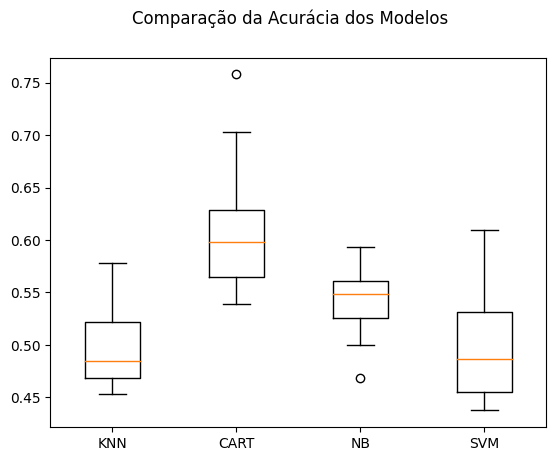

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7) 

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test) 

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.684375
